In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [ ]:

path = r"D:\ML\Projects-20240722T093004Z-001\Projects\mobile_phone_pricing\Mobile Phone Pricing\dataset.csv"
mobile_data =pd.read_csv(path)
df = mobile_data

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.shape

(2000, 21)

In [9]:
df.isnull().sum().sort_values(ascending=False)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

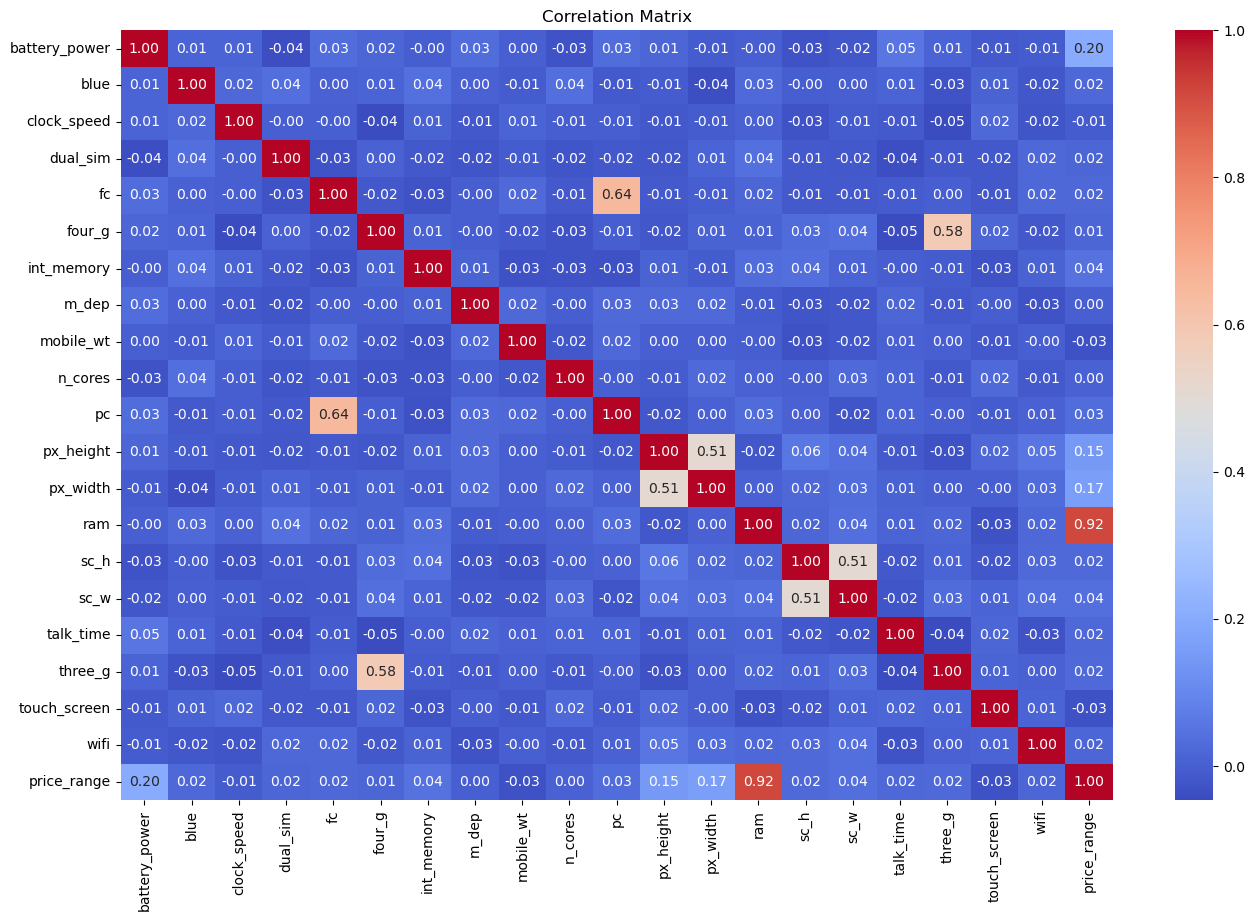

In [10]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

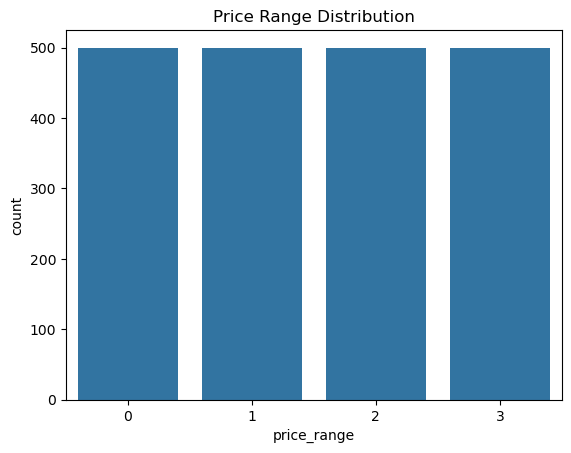

In [11]:
# Target distribution
sns.countplot(data=df, x='price_range')
plt.title("Price Range Distribution")
plt.show()

In [12]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

X.shape, y.shape


((2000, 20), (2000,))

In [13]:
numerical_cols  = X.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()) ])


preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_cols) ])

numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [16]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['battery_power', 'blue', 'clock_speed',
                                  'dual_sim', 'fc', 'four_g', 'int_memory',
                                  'm_dep', 'mobile_wt', 'n_cores', 'pc',
                                  'px_height', 'px_width', 'ram', 'sc_h',
                                  'sc_w', 'talk_time', 'three_g',
                                  'touch_screen', 'wifi'])])

In [17]:
def evaluate_model_metrics(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [18]:
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [22]:
# Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LogisticRegression(multi_class='multinomial', max_iter=1000))])
lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
lr_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['battery_power', 'blue',
                                                   'clock_speed', 'dual_sim',
                                                   'fc', 'four_g', 'int_memory',
                                                   'm_dep', 'mobile_wt',
                                                   'n_cores', 'pc', 'px_height',
                                                   'px_width', 'ram', 'sc_h',
                                                   'sc_w', 'talk_time',
                                                   'three_g', 'touch_screen',
                                                   'wifi'])])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [25]:
Logistic_Regression_metrics = evaluate_model_metrics(y_test, lr_preds, model_name="LogisticRegression")


Evaluation Metrics for LogisticRegression:
Accuracy : 0.9750
Precision: 0.9759
Recall   : 0.9750
F1 Score : 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



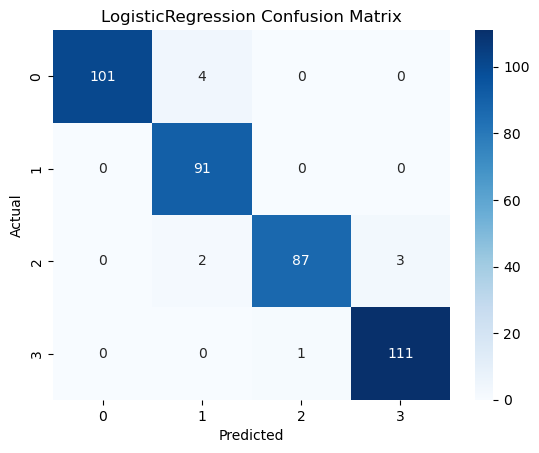

In [26]:
plot_confusion_matrix(y_test, lr_preds, model_name="LogisticRegression")

In [27]:
# RandomForestclassifire

rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model',RandomForestClassifier(random_state=0))])
rfc_pipeline.fit(X_train, y_train)
rfc_preds = rfc_pipeline.predict(X_test)


In [28]:
RandomForestClassifier_metrics = evaluate_model_metrics(y_test, rfc_preds, model_name="RandomForestClassifier")


Evaluation Metrics for RandomForestClassifier:
Accuracy : 0.8775
Precision: 0.8796
Recall   : 0.8775
F1 Score : 0.8782

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.84      0.85      0.84        91
           2       0.78      0.83      0.80        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



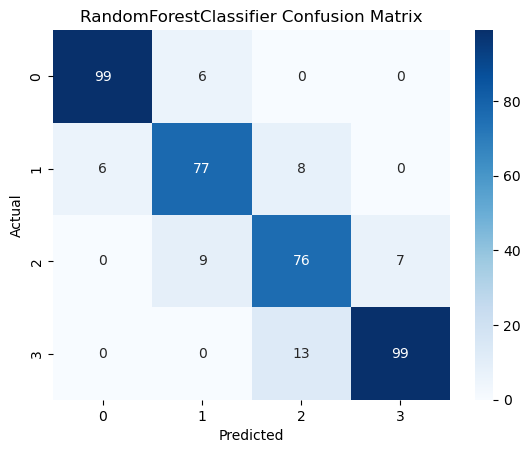

In [29]:
plot_confusion_matrix(y_test, rfc_preds, model_name="RandomForestClassifier")

In [30]:
# Support vector Classifire
svc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', SVC(kernel='rbf'))])
svc_pipeline.fit(X_train, y_train)
svc_preds = svc_pipeline.predict(X_test)

In [31]:
Support_vector_classifire_metrics = evaluate_model_metrics(y_test, svc_preds, model_name="Support_vector_classifire(SVC)")


Evaluation Metrics for Support_vector_classifire(SVC):
Accuracy : 0.8925
Precision: 0.8956
Recall   : 0.8925
F1 Score : 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



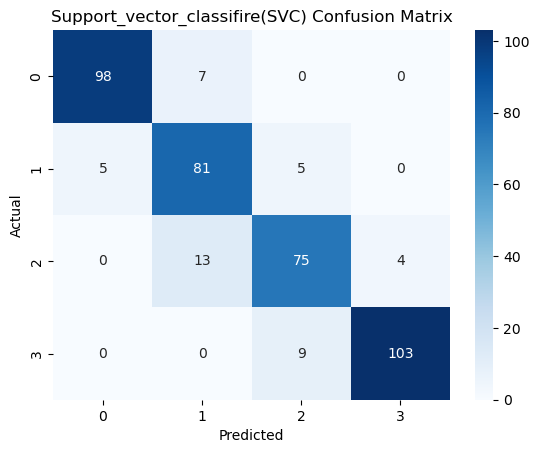

In [32]:
plot_confusion_matrix(y_test, svc_preds, model_name="Support_vector_classifire(SVC)")

In [35]:
# KNeighborsClassifier
knn_pipeline = Pipeline(steps=[ ('preprocessor', preprocessor),
                               ('model', KNeighborsClassifier()) ])

knn_pipeline.fit(X_train, y_train)
knn_preds = knn_pipeline.predict(X_test)

In [36]:
KNeighbors_Classifier_metrics = evaluate_model_metrics(y_test, svc_preds, model_name="KNeighborsClassifier(KNN)")


Evaluation Metrics for KNeighborsClassifier(KNN):
Accuracy : 0.8925
Precision: 0.8956
Recall   : 0.8925
F1 Score : 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



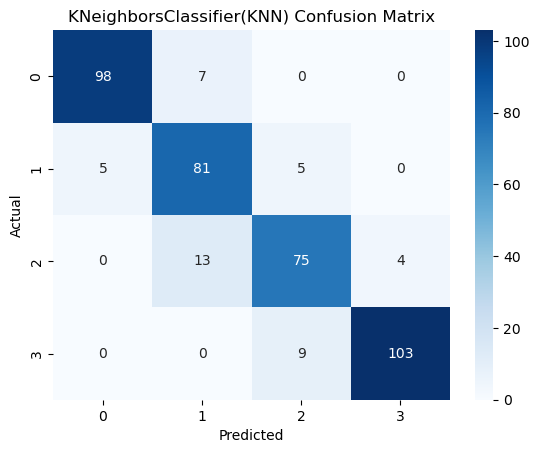

In [37]:
plot_confusion_matrix(y_test, svc_preds, model_name="KNeighborsClassifier(KNN)")

In [38]:
# XGBClassifier
xgb_pipeline = Pipeline(steps=[ ('preprocessor', preprocessor),
                                ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)) ])

xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_test)

In [39]:
XGB_Classifier_metrics = evaluate_model_metrics(y_test, svc_preds, model_name="XGBClassifier")


Evaluation Metrics for XGBClassifier:
Accuracy : 0.8925
Precision: 0.8956
Recall   : 0.8925
F1 Score : 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



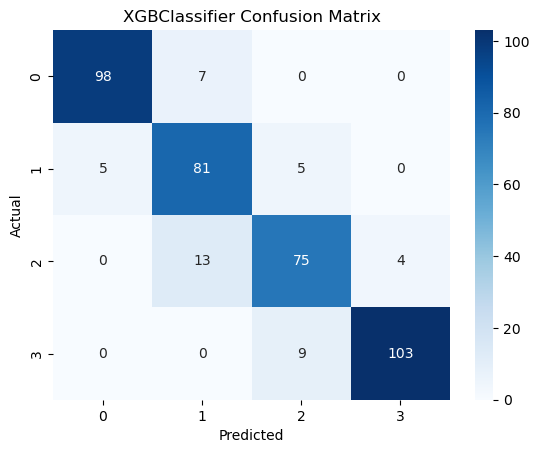

In [40]:
plot_confusion_matrix(y_test, svc_preds, model_name="XGBClassifier")

In [41]:
# results for all models
results = [Logistic_Regression_metrics,RandomForestClassifier_metrics,Support_vector_classifire_metrics,KNeighbors_Classifier_metrics,XGB_Classifier_metrics]

# Convert to DataFrame
results_df = pd.DataFrame(results)
display(results_df)


,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.9750,0.975946,0.9750,0.975020
1,RandomForestClassifier,0.8775,0.879623,0.8775,0.878234
2,Support_vector_classifire(SVC),0.8925,0.895561,0.8925,0.893296
3,KNeighborsClassifier(KNN),0.8925,0.895561,0.8925,0.893296
4,XGBClassifier,0.8925,0.895561,0.8925,0.893296


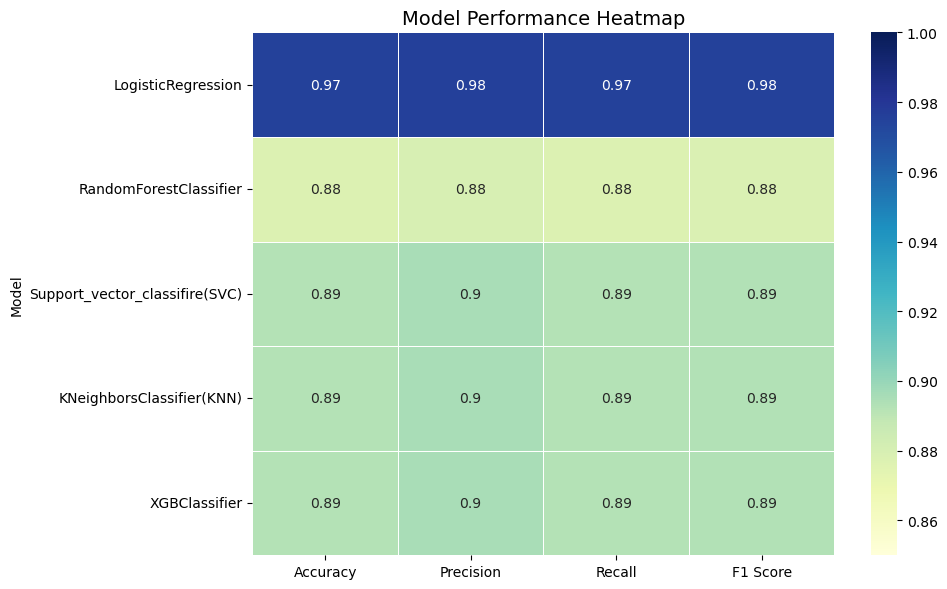

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df.set_index("Model"),
    annot=True,
    cmap="YlGnBu",
    vmin=0.85,
    vmax=1.0,
    linewidths=0.5,
)
plt.title("Model Performance Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [44]:
# Save the best model using joblib
from joblib import dump, load
dump(lr_pipeline, 'LogisticRegression.joblib')
model = load('LogisticRegression.joblib')

In [46]:
loaded_model = load('LogisticRegression.joblib')
sample_preds = loaded_model.predict(X_test)

In [47]:
Loded_model_metrics = evaluate_model_metrics(y_test, sample_preds, model_name="LogisticRegression_loaded_model")


Evaluation Metrics for LogisticRegression_loaded_model:
Accuracy : 0.9750
Precision: 0.9759
Recall   : 0.9750
F1 Score : 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



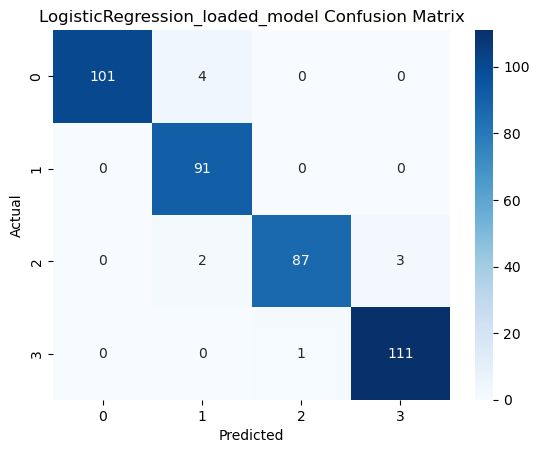

In [48]:
plot_confusion_matrix(y_test, sample_preds, model_name="LogisticRegression_loaded_model")

In [51]:
# Convert to a DataFrame for comparison

comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': sample_preds
})

# View top 10 rows
print(comparison_df.head(10))


      Actual Price  Predicted Price
1860             0                0
353              2                2
1333             1                1
905              3                3
1289             1                1
1273             1                1
938              2                2
1731             0                0
65               3                3
1323             1                1


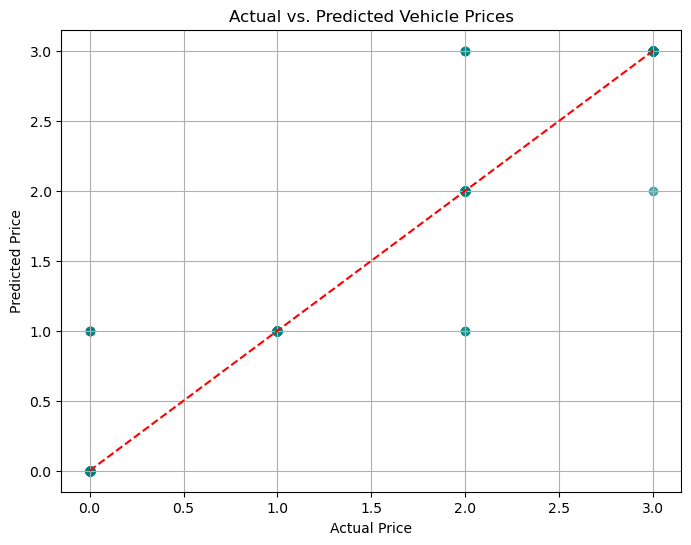

In [52]:
# Show actual vs. predicted for a few prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sample_preds, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Vehicle Prices')
plt.grid(True)
plt.show()


In [56]:
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:,.2f} | Predicted: {sample_preds[i]:,.2f}")

Actual: 0.00 | Predicted: 0.00
Actual: 2.00 | Predicted: 2.00
Actual: 1.00 | Predicted: 1.00
Actual: 3.00 | Predicted: 3.00
Actual: 1.00 | Predicted: 1.00
